In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from processing.postprocessing import train_test_df_split, train_test_handling, emg_augmentation
from models.lin_reg import Linear_Regression
from models.random_forest_reg import Random_Forest_Regression
from models.xgboost import XGBoost

In [2]:
df = pd.read_csv('subject_10.csv')

In [3]:
df.shape

(10980, 13)

In [4]:
df.head()

,EMG_0,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,export_X,export_Y,export_Type,export_Trial,subject_num
0,0.729656,0.557775,0.579932,0.391215,0.410019,0.372657,0.687624,0.553393,0.710145,0.990654,1.0,1.0,10
1,0.672599,0.564868,0.655753,0.378435,0.488215,0.315432,0.789942,0.634305,0.710145,0.990654,1.0,1.0,10
2,0.581368,0.573098,0.769371,0.374919,0.577953,0.261059,0.870086,0.718899,0.710145,0.990654,1.0,1.0,10
3,0.497359,0.594359,0.902709,0.383629,0.656894,0.217984,0.926559,0.794399,0.659903,1.000000,1.0,1.0,10
4,0.461606,0.629057,1.032008,0.398657,0.697852,0.195428,0.938892,0.821978,0.509058,0.972547,1.0,1.0,10


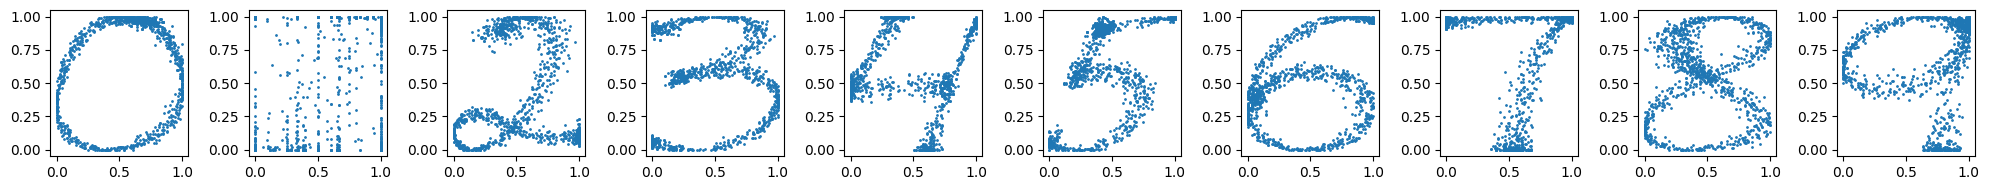

In [5]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for j in range(10):
    ax[j].scatter(df[df["export_Type"] == j+1]["export_X"], 
                     df[df["export_Type"] == j+1]["export_Y"], s=1)
plt.tight_layout()

In [6]:
train_df, val_df = train_test_df_split(df, 5)
train_df, test_df = train_test_df_split(train_df, 4)

In [7]:
# train_df = emg_augmentation(train_df, 25, 0.5, 4)

In [8]:
X_train, y_train, train_trials, train_type, \
    X_val, y_val, val_trials, val_type = train_test_handling(train_df, val_df, True, (11, 8), "constant")

In [9]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6580, 88), (2200, 88), (6580, 2), (2200, 2))

In [10]:
X_train, y_train, train_trials, train_type, \
    X_test, y_test, test_trials, test_type = train_test_handling(train_df, test_df, True, (11, 8), "constant")

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6580, 88), (2200, 88), (6580, 2), (2200, 2))

# Linear Regression

In [12]:
lr = Linear_Regression()
lr_clf = lr.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

In [13]:
lr_clf.score(X_test, y_test)

0.6489813894596888

In [14]:
lr_x_preds, lr_y_preds = lr.predict(X_test)

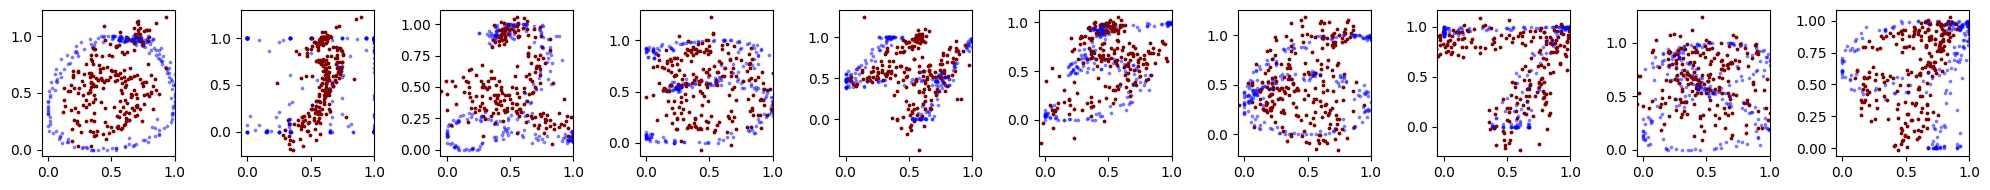

In [15]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    mask = test_type == i+1
    trials = test_trials[mask]
    x_masked = lr_x_preds[mask]
    y_masked = lr_y_preds[mask]
    x_true = y_test[mask, 0]
    y_true = y_test[mask, 1]    
    for t in np.unique(trials):
        mask = trials == t
        x = x_masked[mask]
        y = y_masked[mask]
        x_t = x_true[mask]
        y_t = y_true[mask]
        ax[i].scatter(x_t, y_t, color='blue', s=3, alpha=0.4)
        ax[i].scatter(x, y, color='maroon', s=3)
        ax[i].set_xlim([-0.05, 1])
plt.tight_layout()
plt.savefig("lin_reg_vis.png", dpi=120)

# Random Forest

In [16]:
rf = Random_Forest_Regression()
rf_clf_x, rf_clf_y = rf.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

In [17]:
rf_clf_x.score(X_test, y_test[:, 0]), rf_clf_y.score(X_test, y_test[:, 1])

(0.7415624694027494, 0.8873217434620668)

In [18]:
rf_x_preds, rf_y_preds = rf.predict(X_test)

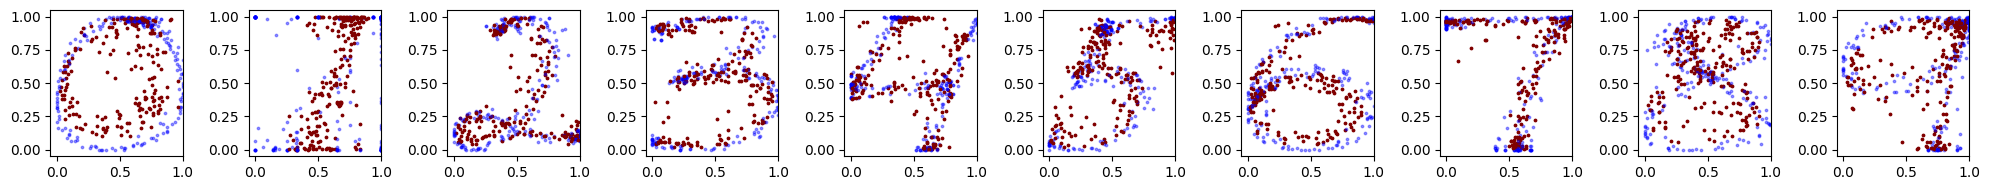

In [19]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    mask = test_type == i+1
    trials = test_trials[mask]
    x_masked = rf_x_preds[mask]
    y_masked = rf_y_preds[mask]
    x_true = y_test[mask, 0]
    y_true = y_test[mask, 1] 
    for t in np.unique(trials):
        mask = trials == t
        x = x_masked[mask]
        y = y_masked[mask]
        x_t = x_true[mask]
        y_t = y_true[mask]
        ax[i].scatter(x_t, y_t, color='blue', s=3, alpha=0.4)
        ax[i].scatter(x, y, color='maroon', s=3)
        ax[i].set_xlim([-0.05, 1])
plt.tight_layout()
plt.savefig("rand_forest_vis.png", dpi=120)

# XGBoost

In [20]:
xg = XGBoost(learning_rate=0.1, max_depth=7, seed=42)
xg_clf_x, xg_clf_y = xg.fit(np.concatenate((X_train, X_val), axis=0), np.concatenate((y_train, y_val), axis=0))

In [21]:
xg_clf_x.score(X_test, y_test[:, 0]), xg_clf_y.score(X_test, y_test[:, 1])

(0.736106088071955, 0.9017997071067975)

In [22]:
xg_x_preds, xg_y_preds = xg.predict(X_test)

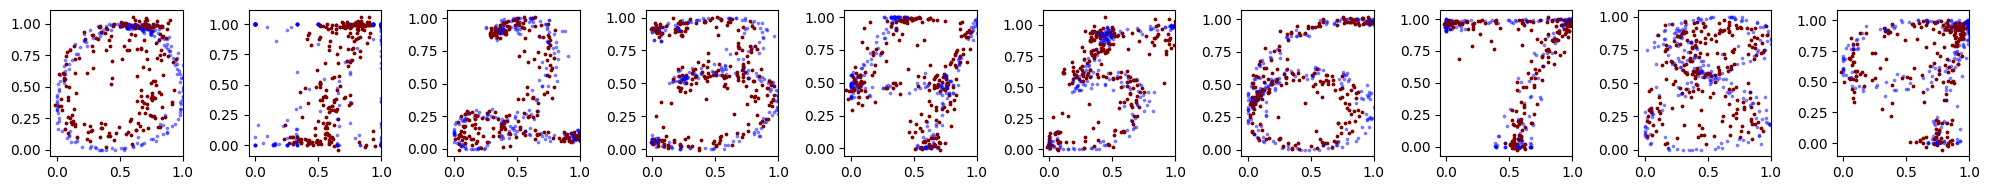

In [23]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    mask = test_type == i+1
    trials = test_trials[mask]
    x_masked = xg_x_preds[mask]
    y_masked = xg_y_preds[mask]
    x_true = y_test[mask, 0]
    y_true = y_test[mask, 1] 
    for t in np.unique(trials):
        mask = trials == t
        x = x_masked[mask]
        y = y_masked[mask]
        x_t = x_true[mask]
        y_t = y_true[mask]
        ax[i].scatter(x_t, y_t, color='blue', s=3, alpha=0.4)
        ax[i].scatter(x, y, color='maroon', s=3)
        ax[i].set_xlim([-0.05, 1])
plt.tight_layout()
plt.savefig("gxboost_vis.png", dpi=120)